In [24]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

data=load_iris()

In [25]:
data.data.shape

(150, 4)

In [26]:
print('Classes to predict:', data.target_names)
print('Features:', data.feature_names)

Classes to predict: ['setosa' 'versicolor' 'virginica']
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [27]:
x=data.data
y=data.target
display(x.shape, y.shape)

(150, 4)

(150,)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

x_train, x_test, y_train, y_test= train_test_split(x,y,random_state= 75, test_size=0.25)

In [29]:
#using Gini
Classifier= DecisionTreeClassifier()
Classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [30]:
y_predict= Classifier.predict(x_test)

In [31]:
from sklearn.metrics import accuracy_score
print('Accuracy on train data using Gini:',accuracy_score(y_train, Classifier.predict(x_train)))
print('Accuracy on test data using Gini:', accuracy_score(y_test, y_predict))

Accuracy on train data using Gini: 1.0
Accuracy on test data using Gini: 0.9736842105263158


In [32]:
#Using Entropy
Classifier_entropy= DecisionTreeClassifier(criterion='entropy')
Classifier_entropy.fit(x_train, y_train)
y_predct_entropy= Classifier_entropy.predict(x_test)
print('Accuracy on train data using Entropy:', accuracy_score(y_train, Classifier_entropy.predict(x_train)))
print('Accuracy on test data using Entropy:', accuracy_score(y_test, y_predct_entropy))

Accuracy on train data using Entropy: 1.0
Accuracy on test data using Entropy: 0.9736842105263158


In [33]:
#entropy with min sample split=50  (min no of nodes to split an internal node) by default its value=2
Classifier_entropy_minsample=DecisionTreeClassifier(criterion='entropy',min_samples_split=50)
Classifier_entropy_minsample.fit(x_train,y_train)
y_predicted_entropy_minsample=Classifier_entropy_minsample.predict(x_test)
print("accuracy on train data",accuracy_score(y_train,Classifier_entropy_minsample.predict(x_train)))
print("accuracy on test data",accuracy_score(y_test,y_predicted_entropy_minsample))

accuracy on train data 0.9642857142857143
accuracy on test data 0.9473684210526315


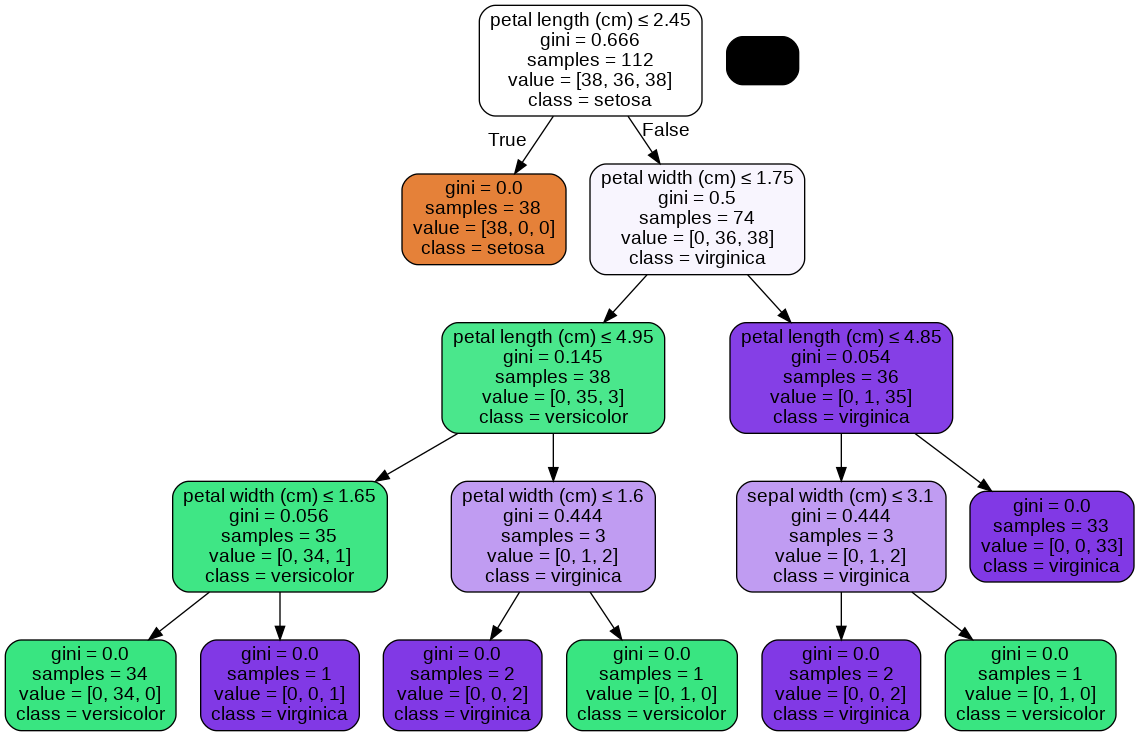

In [34]:
#visualisation
from sklearn.tree import export_graphviz
from six import StringIO   
from IPython.display import Image
import pydotplus 

dot_data=StringIO()
export_graphviz(Classifier,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=data.feature_names,class_names=data.target_names)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())